In [4]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.model_selection import train_test_split
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import OneHotEncoder, StandardScaler
from sklearn.pipeline import Pipeline
from sklearn.compose import ColumnTransformer

In [5]:
# Opción para ver todas las columnas del dataset en el notebook
pd.set_option('display.max_columns', 50)

# Práctico 04: Aprendizaje Supervisado

Para finalizar nuestro modelo, aplicaremos estrategias de sampling para dividir entre train y test y haremos crossvalidation sobre train. Realizaremos pruebas con varios clasificadores y evaluaremos los resultados con múltiples métricas. Por último calcularemos el feature importance y obtendremos conclusiones.

## Objetivo del práctico

### Train-Validation-Test
(obtener del práctico anterior)
- División del dataset en train/validation/test
- Estratificación

### Preprocesamiento
(obtener del práctico anterior)
- Tratamiento de valores nulos
- Estandarización
- Encoding de variables categóricas

### Definición de métricas

Definiremos las métricas a utilizar:
- Accuracy
- Precision
- Recall
- F1
- AUC
- PRAUC  

Además investigaremos como utilizar el classification report y confusion matrix. Adicionalmente, cómo usar crossvalidation.

### Testeo con varios modelos

Realizaremos varios tests con diversos tipos de modelos de scikit-learn:
- Logistic regression
- SVM
- Naive Bayes
- etc  
Usaremos crossvalidation y compararemos con validation y test.

### Modelos Tree Based

En esta instancia utilizaremos modelos que no pertenecen a la librería scikit-learn.  
Estos modelos son los más utilizados actualmente y han demostrado su efectividad en muchas competencias de Kaggle.  
Además, tienen la ventaja de que 
- XGBoost
- LightGBM

### Optimización de Hiperparámetros

En esta sección realizaremos varios tipos de optimización de hiperparámetros para lograr mejorar nuestras métricas.
- Grid Search
- Randomized Search

### Explainability

Realizaremos feature importance y como opcional utilizaremos la librería SHAP para analizar las predicciones.


### Presentación

Al final del práctico, es necesario hacer 3 o 4 slides que irán incluidos en la presentación final.  
Los slides deberán contener las etapas de preprocesamiento, los modelos que utilizamos, como optimizamos los hiperparámetros, cómo validamos y qué métricas utilizamos. Por último responderemos desde el punto de vista de negocio si sirve o no sirve el modelo.

### Librerías recomendadas

Utilizaremos principalmente scikit-learn, opcionalmente xgboost y lightgbm.  
Recomiendo el siguiente material:  

- https://scikit-learn.org/stable/ -> Referencia de librería scikit-learn. Contiene casi todo lo que vamos a utilizar, pipelines, preprocesamiento y varios modelos.
- https://xgboost.readthedocs.io/en/latest/ -> Librería muy utilizada debido a que tiene muy buenos resultados. Es un tipo de algoritmo "boosting tree"
- https://lightgbm.readthedocs.io/en/latest/ -> Otra librería similar a xgboost, cada vez se usa más, debido a su facilidad de uso y buenos resultados.
- https://shap.readthedocs.io/en/latest/index.html -> Librería SHAP, para realizar explainability y analizar predicciones.
- https://scikit-learn.org/stable/auto_examples/model_selection/grid_search_text_feature_extraction.html#sphx-glr-auto-examples-model-selection-grid-search-text-feature-extraction-py -> Ejemplo de pipelines, cross_validation y optimización de hiperparámetros

## Práctico 03: Aprendizaje Supervisado - Resolución

In [14]:
# Leemos el dataset con la función de pandas "read_csv"
df = pd.read_csv("data/bank-additional-full.csv", sep=";")

### Train-Validation-Test

(Obtener el código del Práctico 03)

In [15]:
# Reemplazamos la columna y (target) por 1 y 0
df.y = df.y.replace('yes', 1)
df.y = df.y.replace('no', 0)

In [16]:
df.y.value_counts()

0    36548
1     4640
Name: y, dtype: int64

In [17]:
X = df.drop(columns='y')
y = df.y

In [18]:
X_temp, X_test, y_temp, y_test = train_test_split(X, y, test_size=0.2, stratify=y, random_state=42)

In [19]:
X_temp.shape, y_temp.shape, X_test.shape, y_test.shape

((32950, 20), (32950,), (8238, 20), (8238,))

In [20]:
X_train, X_val, y_train, y_val = train_test_split(X_temp, y_temp, test_size=0.2, stratify=y_temp, random_state=42)

In [21]:
X_train.shape, y_train.shape, X_val.shape, y_val.shape

((26360, 20), (26360,), (6590, 20), (6590,))

### Preprocesamiento

(Obtener el código del Práctico 03)

In [23]:
df.head()

,age,job,marital,education,default,housing,loan,contact,month,day_of_week,duration,campaign,pdays,previous,poutcome,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed,y
0,56,housemaid,married,basic.4y,no,no,no,telephone,may,mon,261,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,0
1,57,services,married,high.school,unknown,no,no,telephone,may,mon,149,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,0
2,37,services,married,high.school,no,yes,no,telephone,may,mon,226,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,0
3,40,admin.,married,basic.6y,no,no,no,telephone,may,mon,151,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,0
4,56,services,married,high.school,no,no,yes,telephone,may,mon,307,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,0


### Definición de métricas

Justificar que métricas se utilizarán:  
- Accuracy
- Precision
- Recall
- F1
- AUC
- PRAUC  

Explicación de las métricas utilizadas a un stakeholder no técnico

In [1]:
# Por ejemplo: nuestro modelo identifica a los clientes que adquieren un plazo fijo.
# PRECISION: de los clientes que nuestro modelo dicen que van a convertir, precision nos indica el porcentaje que convirtieron realmente.
# Si nuestro modelo nos indica que 80 clientes van a convertir y tenemos un precision de 50% esto quiere decir que realmente convierten 40 clientes.

In [2]:
# RECALL

# Otras métricas que utilizaremos


### Testeo con varios modelos

Realizaremos varios tests con diversos tipos de modelos de scikit-learn:
- Logistic regression
- SVM
- Naive Bayes
- etc  
Usaremos crossvalidation y compararemos con validation y test.

In [51]:
df.head(2)

,age,job,marital,education,default,housing,loan,contact,month,day_of_week,duration,campaign,pdays,previous,poutcome,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed,y
0,56,housemaid,married,basic.4y,no,no,no,telephone,may,mon,261,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,0
1,57,services,married,high.school,unknown,no,no,telephone,may,mon,149,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,0


In [62]:
# Este es un ejemplo utilizando solo unas pocas columnas y casi sin aplicar transformaciones
# Debería realizarse un proceso similar para cada modelo incluyendo todas las columnas y transformaciones
# Tener en cuenta de que cada modelo tiene sus particularidades, por ejemplo para modelos lineales es necesario estandarizar variables numéricas,
# y además es necesario utilizar one hot encoding para variables categóricas.
# En estas situaciones el uso de pipelines nos ayuda a organizar muchísimo nuestro código.

from sklearn.neighbors import KNeighborsClassifier

variables_numericas = ['cons.price.idx', 'cons.conf.idx', 'age','duration']
variables_categoricas = ['education', 'marital','job', 'contact', 'day_of_week']

# Filtramos las variables que seleccionamos
X_t = X_train[variables_categoricas + variables_numericas]

pipeline_numerico = Pipeline([
                             ('standard_scaler', StandardScaler()),
                            ])

pipeline_completo = ColumnTransformer([('num', pipeline_numerico, variables_numericas),
                                   ('cat', OneHotEncoder(), variables_categoricas),
                                  ])

pipeline_modelo = Pipeline([('preprocess', pipeline_completo),
                            ('logistic', KNeighborsClassifier())])

In [63]:
pipeline_modelo

Pipeline(steps=[('preprocess',
                 ColumnTransformer(transformers=[('num',
                                                  Pipeline(steps=[('standard_scaler',
                                                                   StandardScaler())]),
                                                  ['cons.price.idx',
                                                   'cons.conf.idx', 'age',
                                                   'duration']),
                                                 ('cat', OneHotEncoder(),
                                                  ['education', 'marital',
                                                   'job', 'contact',
                                                   'day_of_week'])])),
                ('logistic', KNeighborsClassifier())])

In [64]:
# Para saber la lista de metricas de sklearn:
# from sklearn import metrics
# list(metrics.SCORERS.keys())

In [66]:
from sklearn.model_selection import cross_validate

cross_validate(pipeline_modelo, X_t, y_train, cv=3, scoring=('precision', 'roc_auc'))

{'fit_time': array([0.0520494 , 0.14641285, 0.21180511]),
 'score_time': array([51.93719649, 25.07858562, 19.97594285]),
 'test_precision': array([0.54089219, 0.56237624, 0.50272232]),
 'test_roc_auc': array([0.81387053, 0.81980858, 0.79978881])}

### Modelos Tree Based

#### XGBoost

In [74]:
# Verificar la documentación, utilizar este tipo de modelos no es muy diferente a scikit-learn.

In [199]:
# Este es un ejemplo que utiliza unas pocas features, practicamente sin preprocesamiento. Utilizar como base.
import xgboost as xgb
variables_numericas = ['cons.price.idx', 'cons.conf.idx', 'age','duration']
variables_categoricas = ['education', 'marital','job', 'contact', 'day_of_week']

# Filtramos las variables que seleccionamos
X_t = X_train[variables_categoricas + variables_numericas]

pipeline_numerico = Pipeline([
                             ('standard_scaler', StandardScaler()),
                            ])

pipeline_completo = ColumnTransformer([('num', pipeline_numerico, variables_numericas),
                                   ('cat', OneHotEncoder(), variables_categoricas),
                                  ])

pipeline_modelo = Pipeline([('preprocess', pipeline_completo),
                            ('xgb', xgb.XGBClassifier())])


In [99]:
pipeline_modelo.fit(X_t, y_train)

/home/leovet/miniconda3/envs/dev/lib/python3.9/site-packages/xgboost/sklearn.py:888: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


[16:50:29] WARNING: /tmp/build/80754af9/xgboost-split_1619724447847/work/src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


Pipeline(steps=[('preprocess',
                 ColumnTransformer(transformers=[('num',
                                                  Pipeline(steps=[('standard_scaler',
                                                                   StandardScaler())]),
                                                  ['cons.price.idx',
                                                   'cons.conf.idx', 'age',
                                                   'duration']),
                                                 ('cat', OneHotEncoder(),
                                                  ['education', 'marital',
                                                   'job', 'contact',
                                                   'day_of_week'])])),
                ('xgb',
                 XGBClassifier(base_score=0.5, booster='gbtree',
                               colsample_bylevel=1, colsample_bynode=1,
                               colsample_bytree=1, gamma=0, gpu_id=-1,
        

In [100]:
pipeline_modelo[1].feature_importances_

array([0.0603403 , 0.15902089, 0.02451167, 0.07917737, 0.02078452,
       0.01590845, 0.02714804, 0.02169254, 0.        , 0.02240145,
       0.02107545, 0.01992671, 0.02237315, 0.01940567, 0.02502994,
       0.01154683, 0.02075959, 0.02457129, 0.01629184, 0.02654256,
       0.02253537, 0.03354277, 0.01308275, 0.0215676 , 0.01929798,
       0.02216144, 0.02199418, 0.01632618, 0.08630488, 0.        ,
       0.02281991, 0.01998859, 0.01824796, 0.0217773 , 0.02184484],
      dtype=float32)

#### LightGBM

In [75]:
# Verificar la documentación, utilizar este tipo de modelos no es muy diferente a scikit-learn.

### Optimización de Hiperparámetros

En esta sección realizaremos varios tipos de optimización de hiperparámetros para lograr mejorar nuestras métricas. Elegiremos uno de los modelos (XGBoost o LightGBM) para buscar los parámetros óptimos.

#### Grid Search

In [72]:
# Esto es un ejemplo de optimización de hiperparámetros utilizando un pipeline y un clasificador de XGBoost
# Este código no corre en nuestro ejemplo, vamos a tener que modificarlo y adecuarlo
# Utilizamos %%time para medir el tiempo del grid search, teniendo cuidado de que si la búsqueda es muy grande puede demorar mucho!!!

#### Randomized Search

In [73]:
# Este ejemplo es muy similar al anterior, y deberíamos lograr unos parámetros parecidos en mucho menos tiempo

### Feature importance y explainability

In [102]:
import xgboost as xgb
variables_numericas = ['cons.price.idx', 'cons.conf.idx', 'age','duration']
variables_categoricas = ['education', 'marital','job', 'contact', 'day_of_week']

# Filtramos las variables que seleccionamos
X_t = X_train[variables_categoricas + variables_numericas]

pipeline_numerico = Pipeline([
                             ('standard_scaler', StandardScaler()),
                            ])

pipeline_completo = ColumnTransformer([('num', pipeline_numerico, variables_numericas),
                                   ('cat', OneHotEncoder(), variables_categoricas),
                                  ])

pipeline_modelo = Pipeline([('preprocess', pipeline_completo),
                            ('xgb', xgb.XGBClassifier())])


In [103]:
pipeline_modelo.fit(X_t, y_train)

/home/leovet/miniconda3/envs/dev/lib/python3.9/site-packages/xgboost/sklearn.py:888: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


[16:51:11] WARNING: /tmp/build/80754af9/xgboost-split_1619724447847/work/src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


Pipeline(steps=[('preprocess',
                 ColumnTransformer(transformers=[('num',
                                                  Pipeline(steps=[('standard_scaler',
                                                                   StandardScaler())]),
                                                  ['cons.price.idx',
                                                   'cons.conf.idx', 'age',
                                                   'duration']),
                                                 ('cat', OneHotEncoder(),
                                                  ['education', 'marital',
                                                   'job', 'contact',
                                                   'day_of_week'])])),
                ('xgb',
                 XGBClassifier(base_score=0.5, booster='gbtree',
                               colsample_bylevel=1, colsample_bynode=1,
                               colsample_bytree=1, gamma=0, gpu_id=-1,
        

#### Obtener los nombres de las variables

In [198]:
# Si realizamos one hot encoding, vamos a tener el problema de que se incrementan el numero de features y necesitamos la nueva lista.
numeric_features = variables_numericas
cat_features = pipeline_modelo.named_steps['preprocess'].transformers_[1][1].get_feature_names(variables_categoricas)

#### Feature importance utilizando XGBoost

In [170]:
onehot_columns = np.array(cat_features)
numeric_features_list = np.array(numeric_features)
numeric_features_list = np.append(numeric_features_list, onehot_columns)

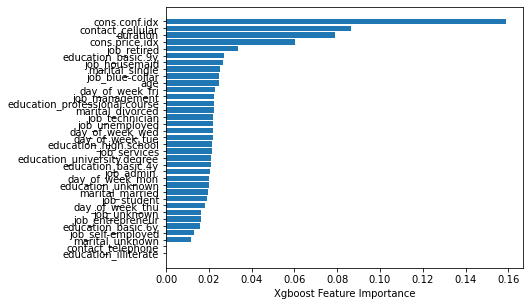

In [191]:
# Es necesario ordenar las los valores del feature importance (utilizamos argsort para tener el orden de los indices)
sorted_idx = pipeline_modelo[1].feature_importances_.argsort()
plt.barh(numeric_features_list[sorted_idx], pipeline_modelo[1].feature_importances_[sorted_idx])
plt.xlabel("Xgboost Feature Importance")
plt.show()

#### Feature importance utilizando eli5

In [165]:
import eli5
# Utilizar eli5 nos resuelve el problema de ordenar las columnas

In [167]:
onehot_columns = cat_features
features_list = list(numeric_features)
features_list.extend(onehot_columns)

In [168]:
eli5.explain_weights(pipeline_modelo[1], top=50, feature_names=features_list)

Weight,Feature
0.1590,cons.conf.idx
0.0863,contact_cellular
0.0792,duration
0.0603,cons.price.idx
0.0335,job_retired
0.0271,education_basic.9y
0.0265,job_housemaid
0.0250,marital_single
0.0246,job_blue-collar
0.0245,age


#### Utilizar SHAP para obtener feature importance y expainability de las predicciones (opcional)

Como opcional, podemos utilizar la librería SHAP que nos muestra un tipo de explainability por cada predicción. Estas pueden ser agregadas para obtener un feature importance global del modelo.


https://shap.readthedocs.io/en/latest/example_notebooks/tabular_examples/tree_based_models/Census%20income%20classification%20with%20XGBoost.html